In [1]:
import pandas as pd
import os
import glob

# Define the directory where your CSV files are located
# Replace this with the actual path to your files
directory = '.'  # Current directory, change if needed

# Get all CSV files
csv_files = ['u235.csv', 'pu242.csv', 'pu240.csv', 'pu239.csv', 
             'pu238.csv', 'cf252.csv', 'cf250.csv']

# Initialize an empty list to store dataframes
dfs = []

# Loop through each CSV file
for file in csv_files:
    file_path = os.path.join(directory, file)
    
    # Check if file exists
    if os.path.exists(file_path):
        try:
            # Read the CSV file
            df = pd.read_csv(file_path)
            
            # Add a column to indicate the source file
            df['source_file'] = file
            
            # Append to the list
            dfs.append(df)
            print(f"Loaded {file}")
        except Exception as e:
            print(f"Error loading {file}: {e}")
    else:
        print(f"File not found: {file}")

# Combine all dataframes
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # Save the combined dataset
    combined_df = combined_df.drop('particle_times', axis=1)
    combined_df.to_csv('combined_dataset.csv', index=False)
    print(f"Combined dataset saved as 'combined_dataset.csv' with {len(combined_df)} rows")
else:
    print("No datasets were loaded successfully.")

Loaded u235.csv
Loaded pu242.csv
Loaded pu240.csv
Loaded pu239.csv
Loaded pu238.csv
Loaded cf252.csv
Loaded cf250.csv
Combined dataset saved as 'combined_dataset.csv' with 89577020 rows


In [21]:
combined_df = pd.read_csv('combined_dataset.csv')

In [1]:
import pandas as pd

u238df = pd.read_csv('u238.csv')

In [ ]:
u238df.head()
u238df = u238df.drop('particle_times', axis=1)
u238df.head()

,source_file,fuel_density,coolant_density,radius,particle_time
0,u238source.py,18.6,0.45,0.1,2.378085e-08
1,u238source.py,18.6,0.45,0.1,3.016298e-07
2,u238source.py,18.6,0.45,0.1,3.528730e-07
3,u238source.py,18.6,0.45,0.1,3.799859e-06
4,u238source.py,18.6,0.45,0.1,7.298256e-06


In [4]:
grouped_df = u238df.groupby(['source_file', 'fuel_density', 'coolant_density', 'radius'])['particle_time'].apply(list).reset_index()

In [5]:
grouped_df

,source_file,fuel_density,coolant_density,radius,particle_time
0,u238source.py,18.6,0.45,0.1,"[2.378085100762213e-08, 3.01629804161493e-07, ..."
1,u238source.py,18.6,0.45,0.2,"[4.756170201524426e-08, 3.254106551691152e-07,..."
2,u238source.py,18.6,0.45,0.3,"[5.305068300914267e-08, 7.666949674295006e-08,..."
3,u238source.py,18.6,0.45,0.4,"[5.305068300914267e-08, 1.0360577050899669e-07..."
4,u238source.py,18.6,0.45,0.5,"[5.305068300914267e-08, 1.2911952925718185e-07..."
...,...,...,...,...,...
139,u238source.py,18.7,1.05,1.0,"[5.2766989517115174e-08, 1.3814588957779785e-0..."
140,u238source.py,18.8,0.45,0.1,"[2.378085100762213e-08, 3.01629804161493e-07, ..."
141,u238source.py,18.8,0.45,0.2,"[4.756170201524426e-08, 3.254106551691152e-07,..."
142,u238source.py,18.8,0.45,0.3,"[5.248631404096032e-08, 7.675438606994513e-08,..."


In [ ]:
grouped_df[]

In [26]:
grouped_df.to_csv('grouped_df.csv', index=False)

In [20]:
combined_df['source_file'].value_counts()

source_file
cf250.csv    168
Name: count, dtype: int64

In [6]:
import numpy as np

# Function to add jitter to a list of times
def add_jitter(times, relative_noise_level=0.05):
    """
    Add Gaussian noise to each time measurement
    
    Parameters:
    times: list of time measurements
    relative_noise_level: standard deviation of the noise as a fraction of the value (default 5%)
    
    Returns:
    List of jittered time measurements
    """
    times = np.array(times)
    # Generate noise with standard deviation proportional to each value
    noise = np.random.normal(0, times * relative_noise_level, size=times.shape)
    # Add noise while ensuring times remain positive
    jittered_times = np.maximum(times + noise, 0)
    return jittered_times.tolist()

# Add a new column with jittered times
grouped_df['jittered_particle_times'] = grouped_df['particle_time'].apply(add_jitter)

In [7]:
grouped_df

,source_file,fuel_density,coolant_density,radius,particle_time,jittered_particle_times
0,u238source.py,18.6,0.45,0.1,"[2.378085100762213e-08, 3.01629804161493e-07, ...","[2.4068498430504764e-08, 3.064237893332268e-07..."
1,u238source.py,18.6,0.45,0.2,"[4.756170201524426e-08, 3.254106551691152e-07,...","[4.719695308404433e-08, 2.8905712309321514e-07..."
2,u238source.py,18.6,0.45,0.3,"[5.305068300914267e-08, 7.666949674295006e-08,...","[5.5144252061032054e-08, 8.05806185755048e-08,..."
3,u238source.py,18.6,0.45,0.4,"[5.305068300914267e-08, 1.0360577050899669e-07...","[5.69574503794051e-08, 1.06358541225271e-07, 2..."
4,u238source.py,18.6,0.45,0.5,"[5.305068300914267e-08, 1.2911952925718185e-07...","[4.833296965865779e-08, 1.3771196881575345e-07..."
...,...,...,...,...,...,...
139,u238source.py,18.7,1.05,1.0,"[5.2766989517115174e-08, 1.3814588957779785e-0...","[5.066201270508243e-08, 1.4768346347841427e-07..."
140,u238source.py,18.8,0.45,0.1,"[2.378085100762213e-08, 3.01629804161493e-07, ...","[2.4355406394693877e-08, 3.1637805446471675e-0..."
141,u238source.py,18.8,0.45,0.2,"[4.756170201524426e-08, 3.254106551691152e-07,...","[4.761807311237752e-08, 3.2402102844798316e-07..."
142,u238source.py,18.8,0.45,0.3,"[5.248631404096032e-08, 7.675438606994513e-08,...","[5.278124590848798e-08, 8.003234067349036e-08,..."


In [8]:
# First convert source_file column to string type
grouped_df['source_file'] = grouped_df['source_file'].astype(str)

# Extract the isotope names using str accessor on the Series
# Use str.extract() to get the pattern, then str.upper() to convert to uppercase
grouped_df['isotopes'] = grouped_df['source_file'].str.extract(r'([a-zA-Z]+\d+)', expand=False).str.upper()

# Keep only the columns we want and reorder them
columns_to_keep = ['isotopes', 'jittered_particle_times']
grouped_df = grouped_df[columns_to_keep]

# Display the first few rows to verify the changes
grouped_df.head()

,isotopes,jittered_particle_times
0,U238,"[2.4068498430504764e-08, 3.064237893332268e-07..."
1,U238,"[4.719695308404433e-08, 2.8905712309321514e-07..."
2,U238,"[5.5144252061032054e-08, 8.05806185755048e-08,..."
3,U238,"[5.69574503794051e-08, 1.06358541225271e-07, 2..."
4,U238,"[4.833296965865779e-08, 1.3771196881575345e-07..."


In [9]:
import pandas as pd
import numpy as np

import numpy as np

# Assuming df is your DataFrame with columns 'isotopes' and 'jittered_particle_times'
def augment_dataset(df):
    """
    Augment the dataset with statistical features calculated from particle times.
    
    Args:
        df: DataFrame with columns 'isotopes' and 'jittered_particle_times'
        
    Returns:
        Augmented DataFrame with additional statistical features
    """
    # Make a copy to avoid modifying the original DataFrame
    augmented_df = df.copy()
    
    # Calculate number of events in each row
    augmented_df['num_events'] = augmented_df['jittered_particle_times'].apply(len)
    
    # Calculate gate width (max time - min time)
    augmented_df['gate_width'] = augmented_df['jittered_particle_times'].apply(
        lambda times: max(times) - min(times) if times else 0
    )
    
    # Calculate mean time
    augmented_df['mean_time'] = augmented_df['jittered_particle_times'].apply(
        lambda times: np.mean(times) if times else 0
    )
    
    # Calculate standard deviation of times
    augmented_df['std_time'] = augmented_df['jittered_particle_times'].apply(
        lambda times: np.std(times) if times else 0
    )
    
    # Calculate time differences between consecutive events
    def get_time_diffs(times):
        if not times or len(times) < 2:
            return []
        sorted_times = sorted(times)
        return list(np.diff(sorted_times))
    
    augmented_df['time_differences'] = augmented_df['jittered_particle_times'].apply(get_time_diffs)
    
    # Calculate mean of time differences
    augmented_df['mean_time_diff'] = augmented_df['time_differences'].apply(
        lambda diffs: np.mean(diffs) if diffs else 0
    )
    
    # Calculate standard deviation of time differences
    augmented_df['std_time_diff'] = augmented_df['time_differences'].apply(
        lambda diffs: np.std(diffs) if len(diffs) > 1 else 0
    )
    
    # Calculate event rate (events per time window)
    augmented_df['event_rate'] = augmented_df.apply(
        lambda row: row['num_events'] / row['gate_width'] if row['gate_width'] > 0 else 0, 
        axis=1
    )
    
    return augmented_df

# Apply the augmentation
augmented_df = augment_dataset(grouped_df)

# Display the results
print(augmented_df.head())

  isotopes                            jittered_particle_times  num_events  \
0     U238  [2.4068498430504764e-08, 3.064237893332268e-07...       45619   
1     U238  [4.719695308404433e-08, 2.8905712309321514e-07...       45552   
2     U238  [5.5144252061032054e-08, 8.05806185755048e-08,...       45215   
3     U238  [5.69574503794051e-08, 1.06358541225271e-07, 2...       45245   
4     U238  [4.833296965865779e-08, 1.3771196881575345e-07...       44781   

   gate_width  mean_time  std_time  \
0    0.000683   0.000098  0.000096   
1    0.000668   0.000099  0.000096   
2    0.000684   0.000099  0.000097   
3    0.000686   0.000100  0.000098   
4    0.000675   0.000098  0.000096   

                                    time_differences  mean_time_diff  \
0  [2.5783472510954786e-10, 4.627259550953226e-10...    1.497403e-08   
1  [3.4993259642465485e-10, 3.2439654660553467e-1...    1.466267e-08   
2  [2.716120304326512e-10, 5.710126138688718e-10,...    1.512591e-08   
3  [3.09382669361662

In [13]:
training_dataset_u238 = augmented_df.drop(['jittered_particle_times', 'time_differences'], axis=1)

In [15]:
training_dataset_u238

,isotopes,num_events,gate_width,mean_time,std_time,mean_time_diff,std_time_diff,event_rate
0,U238,45619,0.000683,0.000098,0.000096,1.497403e-08,1.502554e-07,6.678375e+07
1,U238,45552,0.000668,0.000099,0.000096,1.466267e-08,1.285431e-07,6.820191e+07
2,U238,45215,0.000684,0.000099,0.000097,1.512591e-08,1.228369e-07,6.611318e+07
3,U238,45245,0.000686,0.000100,0.000098,1.517246e-08,1.283177e-07,6.591035e+07
4,U238,44781,0.000675,0.000098,0.000096,1.507370e-08,1.177308e-07,6.634219e+07
...,...,...,...,...,...,...,...,...
139,U238,89797,0.000917,0.000112,0.000111,1.021263e-08,1.083641e-07,9.791903e+07
140,U238,45616,0.000719,0.000098,0.000096,1.576527e-08,2.187444e-07,6.343195e+07
141,U238,45552,0.000667,0.000099,0.000096,1.463299e-08,1.130326e-07,6.834022e+07
142,U238,45199,0.000669,0.000099,0.000096,1.481152e-08,1.115396e-07,6.751652e+07


In [14]:
training_dataset

,isotopes,num_events,gate_width,mean_time,std_time,mean_time_diff,std_time_diff,event_rate
0,CF250,32227,0.000757,0.000099,0.000101,2.348961e-08,1.949953e-07,4.257334e+07
1,CF250,28862,0.000791,0.000099,0.000103,2.741949e-08,2.923100e-07,3.647167e+07
2,CF250,26242,0.000747,0.000097,0.000102,2.848527e-08,2.056858e-07,3.510720e+07
3,CF250,25296,0.000808,0.000098,0.000107,3.195518e-08,2.783243e-07,3.129507e+07
4,CF250,23494,0.000863,0.000095,0.000105,3.672391e-08,4.883918e-07,2.723137e+07
...,...,...,...,...,...,...,...,...
1410,U235,115453,0.000865,0.000096,0.000111,7.492946e-09,1.183652e-07,1.334600e+08
1411,U235,122651,0.000951,0.000095,0.000113,7.753769e-09,9.439990e-08,1.289706e+08
1412,U235,126851,0.000790,0.000095,0.000112,6.226493e-09,8.756617e-08,1.606053e+08
1413,U235,131697,0.000805,0.000092,0.000110,6.112801e-09,5.415533e-08,1.635924e+08


In [16]:
train_data = pd.concat([training_dataset_u238, training_dataset])

In [18]:
train_data
train_data.to_csv("train_data.csv", index=False)

In [12]:
training_dataset = pd.read_csv('training_dataset.csv')

In [37]:
training_dataset.to_csv("training_dataset.csv", index=False)

In [20]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install openmc


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 3.9 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.6 MB/s eta 0:00:00a 0:00:01
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 12.5 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
ERROR: Could not find a version that satisfies the requirement openmc (from versions: none)
ERROR: No matching distribution found for openmc



Encoded Classes:
0: CF250
1: CF252
2: PU238
3: PU239
4: PU240
5: PU242
6: U235
7: U238

Training set size: 1169 samples
Testing set size: 390 samples

===== Training Random Forest Classifier =====

-------------------- Random Forest Evaluation --------------------
Accuracy: 0.8846

Classification Report:
              precision    recall  f1-score   support

       CF250       0.86      0.86      0.86        42
       CF252       0.96      0.92      0.94        50
       PU238       0.86      0.97      0.91        62
       PU239       0.84      0.86      0.85        50
       PU240       0.93      1.00      0.96        89
       PU242       0.33      0.08      0.13        12
        U235       0.83      0.82      0.82        49
        U238       0.94      0.83      0.88        36

    accuracy                           0.88       390
   macro avg       0.82      0.79      0.79       390
weighted avg       0.87      0.88      0.88       390



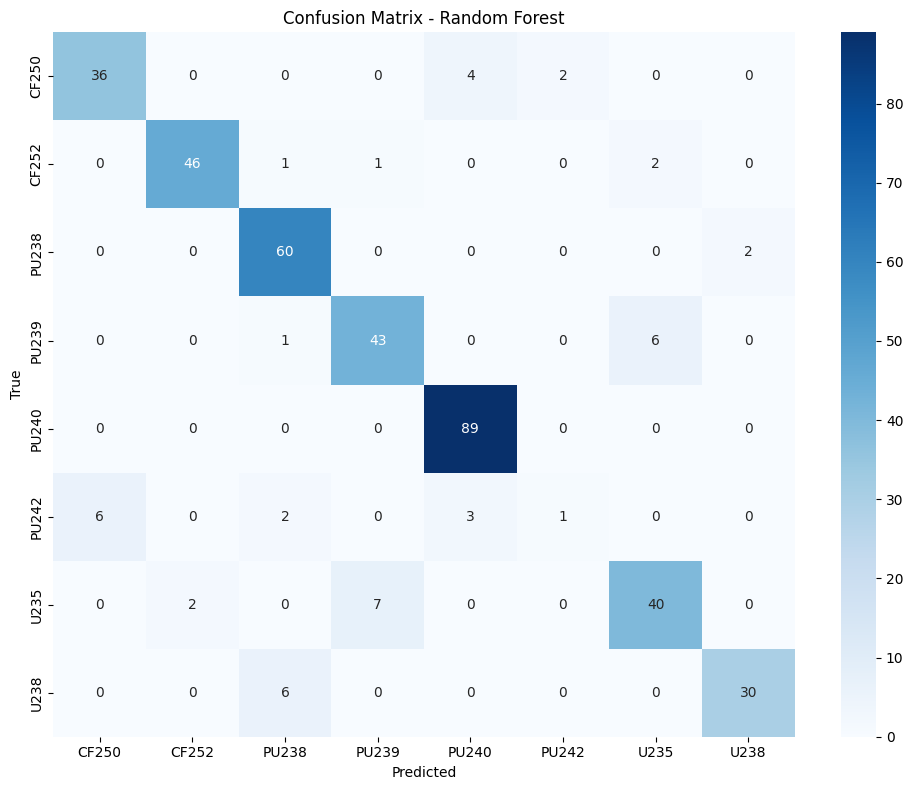

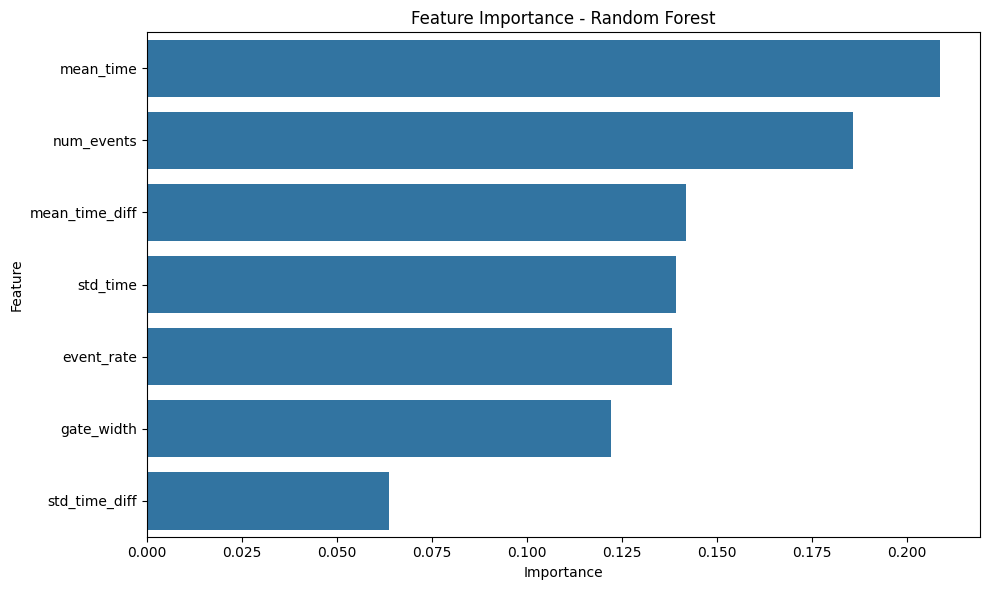


Feature Importance:
          Feature  Importance
2       mean_time    0.208852
0      num_events    0.185867
4  mean_time_diff    0.141800
3        std_time    0.139184
6      event_rate    0.138286
1      gate_width    0.122142
5   std_time_diff    0.063870

===== Training Support Vector Machine =====

-------------------- SVM Evaluation --------------------
Accuracy: 0.8077

Classification Report:
              precision    recall  f1-score   support

       CF250       0.74      0.83      0.79        42
       CF252       0.64      0.72      0.68        50
       PU238       0.87      0.97      0.92        62
       PU239       0.82      0.54      0.65        50
       PU240       0.99      0.88      0.93        89
       PU242       0.47      0.58      0.52        12
        U235       0.69      0.78      0.73        49
        U238       0.94      0.94      0.94        36

    accuracy                           0.81       390
   macro avg       0.77      0.78      0.77       390

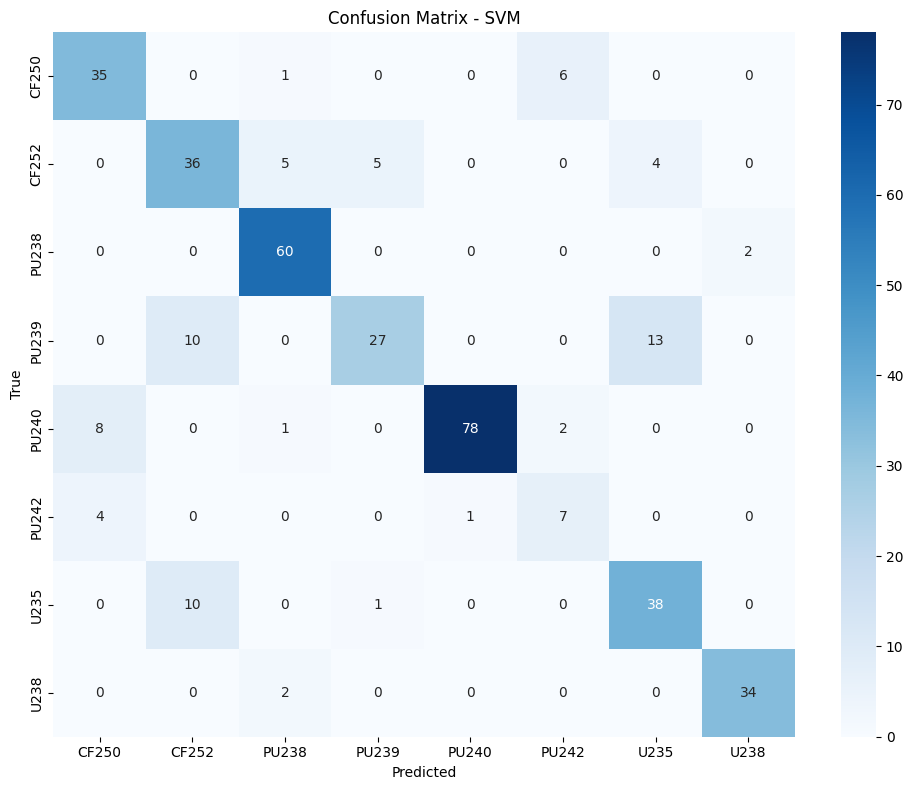


===== Training Neural Network =====

-------------------- Neural Network Evaluation --------------------
Accuracy: 0.8667

Classification Report:
              precision    recall  f1-score   support

       CF250       0.83      0.93      0.88        42
       CF252       0.79      0.82      0.80        50
       PU238       0.91      0.98      0.95        62
       PU239       0.75      0.78      0.76        50
       PU240       0.98      0.97      0.97        89
       PU242       0.62      0.42      0.50        12
        U235       0.80      0.67      0.73        49
        U238       0.97      0.94      0.96        36

    accuracy                           0.87       390
   macro avg       0.83      0.81      0.82       390
weighted avg       0.86      0.87      0.86       390



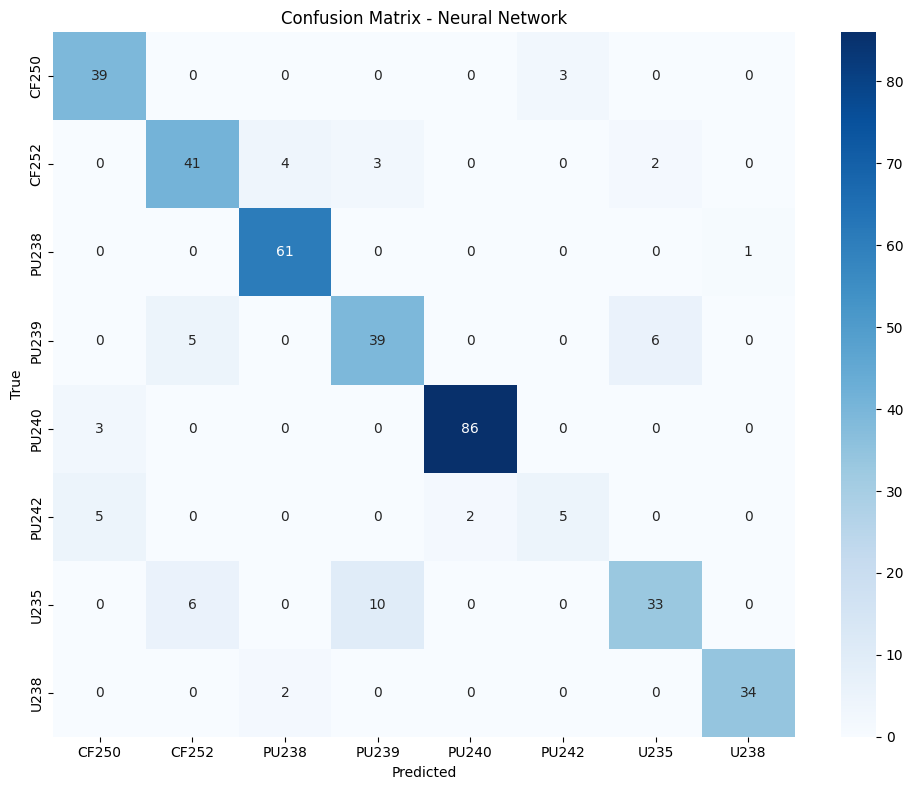


===== Training Logistic Regression =====

-------------------- Logistic Regression Evaluation --------------------
Accuracy: 0.6769

Classification Report:
              precision    recall  f1-score   support

       CF250       0.57      0.48      0.52        42
       CF252       0.52      0.44      0.48        50
       PU238       0.79      0.85      0.82        62
       PU239       0.67      0.60      0.63        50
       PU240       0.86      0.79      0.82        89
       PU242       0.23      0.50      0.32        12
        U235       0.61      0.61      0.61        49
        U238       0.73      0.92      0.81        36

    accuracy                           0.68       390
   macro avg       0.62      0.65      0.63       390
weighted avg       0.69      0.68      0.68       390



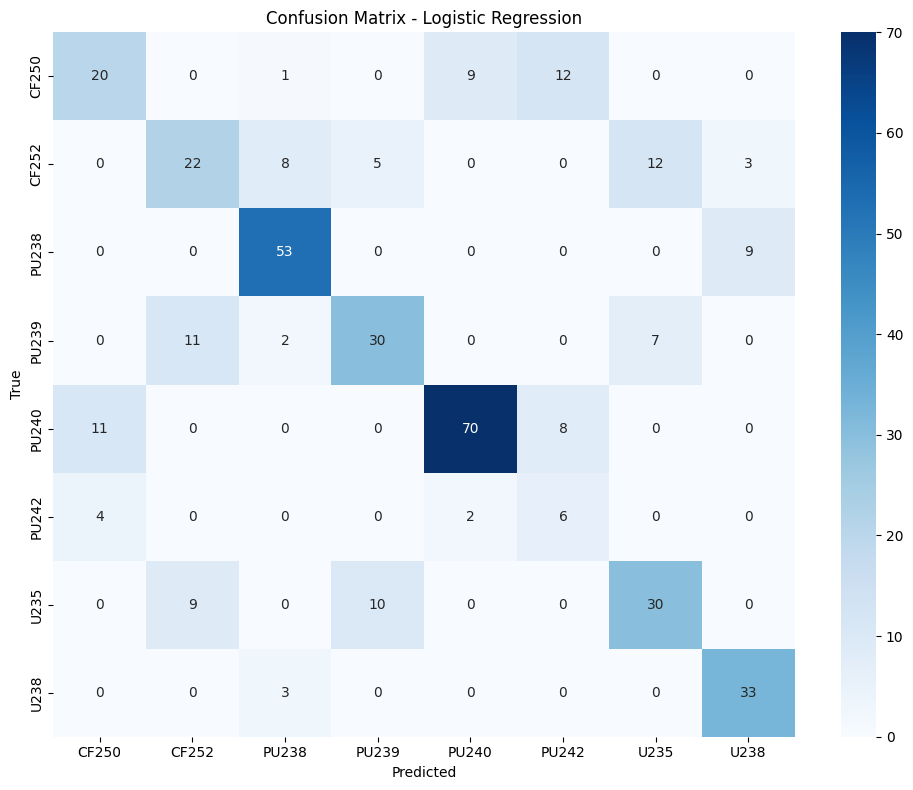


===== Training K-Nearest Neighbors =====

-------------------- KNN Evaluation --------------------
Accuracy: 0.8359

Classification Report:
              precision    recall  f1-score   support

       CF250       0.89      0.81      0.85        42
       CF252       0.83      0.90      0.87        50
       PU238       0.80      0.95      0.87        62
       PU239       0.79      0.74      0.76        50
       PU240       0.88      0.94      0.91        89
       PU242       0.29      0.17      0.21        12
        U235       0.84      0.73      0.78        49
        U238       0.91      0.81      0.85        36

    accuracy                           0.84       390
   macro avg       0.78      0.76      0.76       390
weighted avg       0.83      0.84      0.83       390



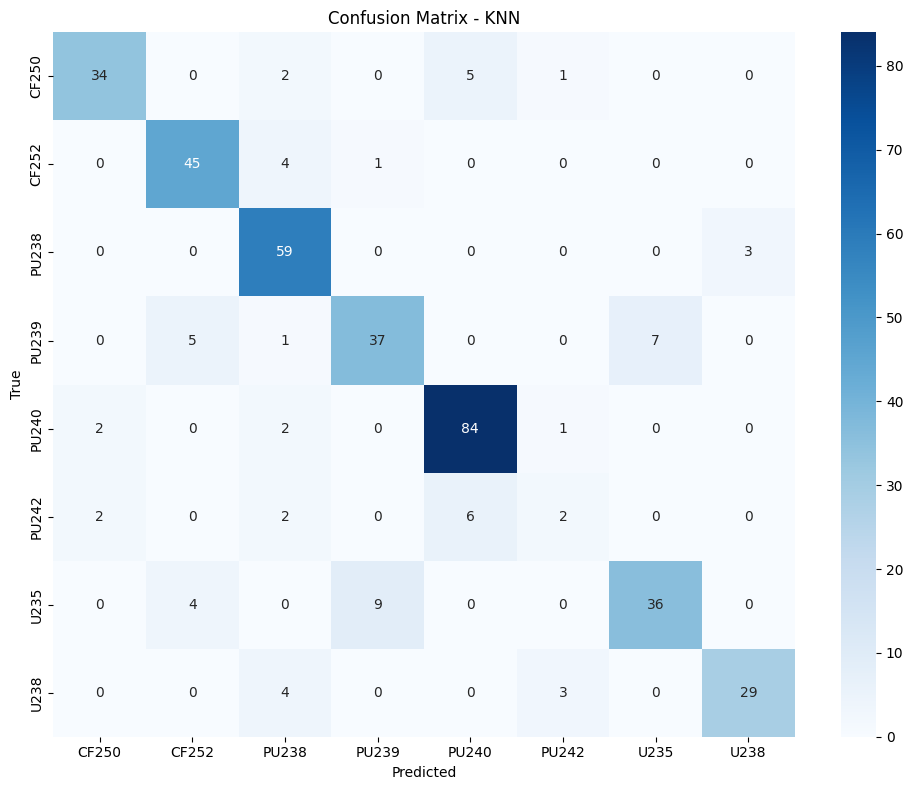


===== Model Comparison =====
                 Model  Accuracy
0        Random Forest  0.884615
2       Neural Network  0.866667
4                  KNN  0.835897
1                  SVM  0.807692
3  Logistic Regression  0.676923


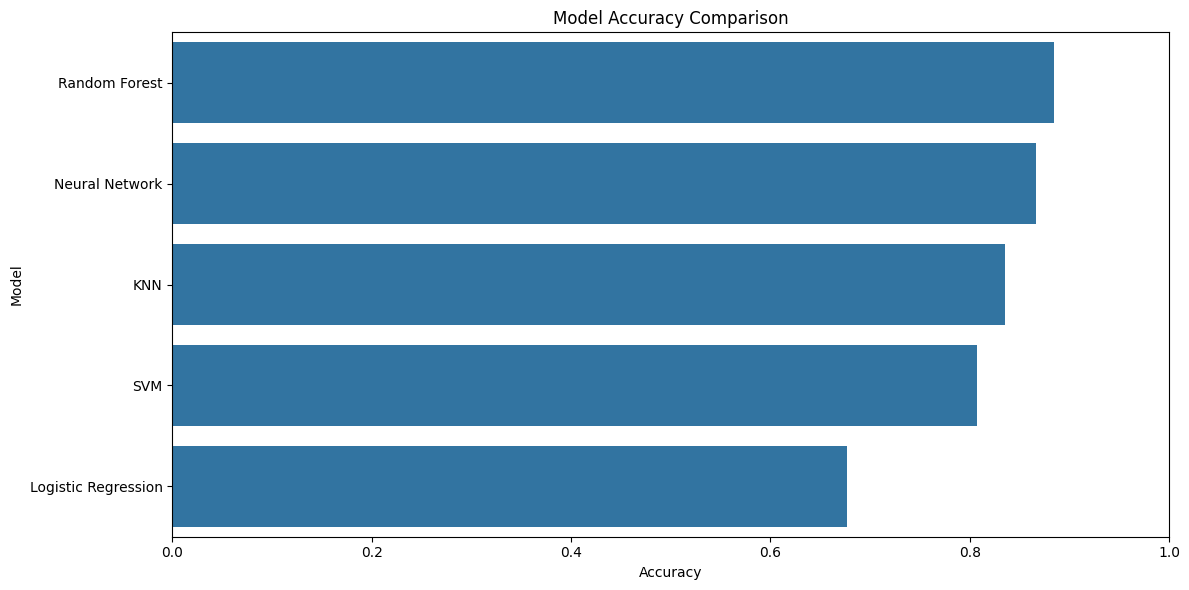


===== Complete =====
To use the saved model for predictions:
1. Load the model: model = joblib.load('isotope_classifier_rf.pkl')
2. Preprocess new data in the same way as the training data
3. Make predictions: predictions = model.predict(new_data)
4. Convert numerical predictions back to isotope names: isotope_names = label_encoder.inverse_transform(predictions)


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

df = train_data

# Preprocess the data
# Separate features and target
X = df.drop('isotopes', axis=1)
y = df['isotopes']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Store the class names for later reference
class_names = label_encoder.classes_
print("\nEncoded Classes:")
for i, name in enumerate(class_names):
    print(f"{i}: {name}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Create a function to evaluate and visualize model results
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"\n{'-'*20} {model_name} Evaluation {'-'*20}")
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()
    
    # For models that provide feature importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f'Feature Importance - {model_name}')
        plt.tight_layout()
        plt.show()
        
        print("\nFeature Importance:")
        print(feature_importance)
    
    return accuracy, y_pred

# Create a dictionary to store model results
results = {}

# 1. Random Forest Classifier
print("\n===== Training Random Forest Classifier =====")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)
rf_accuracy, rf_pred = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")
results['Random Forest'] = rf_accuracy

# 2. Support Vector Machine
print("\n===== Training Support Vector Machine =====")
# Scale the data for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(
    C=10,
    kernel='rbf',
    gamma='scale',
    probability=True,
    class_weight='balanced',
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)
svm_accuracy, svm_pred = evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "SVM")
results['SVM'] = svm_accuracy

# 3. Neural Network
print("\n===== Training Neural Network =====")
# Already using scaled data for the neural network
nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='adaptive',
    max_iter=500,
    random_state=42
)
nn_model.fit(X_train_scaled, y_train)
nn_accuracy, nn_pred = evaluate_model(nn_model, X_train_scaled, X_test_scaled, y_train, y_test, "Neural Network")
results['Neural Network'] = nn_accuracy

# 4. Logistic Regression
print("\n===== Training Logistic Regression =====")
# Already using scaled data for logistic regression
lr_model = LogisticRegression(
    C=1.0,
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)
lr_model.fit(X_train_scaled, y_train)
lr_accuracy, lr_pred = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")
results['Logistic Regression'] = lr_accuracy

# 5. K-Nearest Neighbors
print("\n===== Training K-Nearest Neighbors =====")
# Already using scaled data for KNN
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    algorithm='auto',
    p=2  # Euclidean distance
)
knn_model.fit(X_train_scaled, y_train)
knn_accuracy, knn_pred = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, "KNN")
results['KNN'] = knn_accuracy

# Compare all models
print("\n===== Model Comparison =====")
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': list(results.values())
}).sort_values(by='Accuracy', ascending=False)

print(results_df)

plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning Example (for Random Forest)
# Uncomment this section if you want to perform grid search
# Warning: This can be computationally intensive

"""
print("\n===== Hyperparameter Tuning for Random Forest =====")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train the best model
best_rf_model = grid_search.best_estimator_
best_rf_accuracy, best_rf_pred = evaluate_model(best_rf_model, X_train, X_test, y_train, y_test, "Best Random Forest")
"""

# Save the best model (here we'll use Random Forest as an example)
# Uncomment the following to save your model
# import joblib
# joblib.dump(rf_model, 'isotope_classifier_rf.pkl')

print("\n===== Complete =====")
print("To use the saved model for predictions:")
print("1. Load the model: model = joblib.load('isotope_classifier_rf.pkl')")
print("2. Preprocess new data in the same way as the training data")
print("3. Make predictions: predictions = model.predict(new_data)")
print("4. Convert numerical predictions back to isotope names: isotope_names = label_encoder.inverse_transform(predictions)")